In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('datasets/kc_house_data.csv')

In [3]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [29]:
# Quantos imóveis existem por número de quartos?
sorted_data = data.sort_values('bedrooms')
minimum = sorted_data.head(1)['bedrooms'].values[0]
maximum = sorted_data.tail(1)['bedrooms'].values[0]
table = dict()
for i in range(minimum, maximum + 1):
    table[str(i)] = sorted_data[sorted_data['bedrooms'] == i].shape[0]
print('-' * 30)
print(f'{"Bedrooms":<15}Properties')
print('-' * 30)
for key, value in table.items():
    if value == 0:
        continue
    print(f'{key:<15}{value}')
print('-' * 30)

------------------------------
Bedrooms       Properties
------------------------------
0              13
1              199
2              2760
3              9824
4              6882
5              1601
6              272
7              38
8              13
9              6
10             3
11             1
33             1
------------------------------


In [26]:
# Quantos imóveis existem por número de quartos? (another solution using groupby)
df_grouped = data[['id', 'bedrooms']].groupby('bedrooms')
print('-' * 30)
print(f'{"Bedrooms":<15}Properties')
print('-' * 30)
for bedrooms, frame in df_grouped:
    print(f'{bedrooms:<15}{frame.shape[0]}')
print('-' * 30)

------------------------------
Bedrooms       Properties
------------------------------
0              13
1              199
2              2760
3              9824
4              6882
5              1601
6              272
7              38
8              13
9              6
10             3
11             1
33             1
------------------------------


In [28]:
df_grouped.size()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
dtype: int64

# Answering boss questions

In [15]:
# 1 - Qual o número de imóveis por ano de construção?
df_grouped = data[['id', 'yr_built']].groupby('yr_built')
print('-' * 30)
print(f'{"Build year":<15}Properties')
print('-' * 30)
for build_year, frame in df_grouped:
    print(f'{build_year:<15}{frame.shape[0]}')
print('-' * 30)

------------------------------
Build year     Properties
------------------------------
1900           87
1901           29
1902           27
1903           46
1904           45
1905           74
1906           92
1907           65
1908           86
1909           94
1910           134
1911           73
1912           79
1913           59
1914           54
1915           64
1916           79
1917           56
1918           120
1919           88
1920           98
1921           76
1922           95
1923           84
1924           139
1925           165
1926           180
1927           115
1928           126
1929           114
1930           90
1931           61
1932           38
1933           30
1934           21
1935           24
1936           40
1937           68
1938           52
1939           106
1940           156
1941           161
1942           223
1943           170
1944           140
1945           95
1946           126
1947           263
1948           235
1949         

In [88]:
# 2 - Qual o menor número de quartos por ano de construção dos imóveis?
#pd.set_option('display.max_rows', df.shape[0] + 1)  # Display all rows from the data frame.
df = data[['bedrooms', 'yr_built']].groupby('yr_built')
print('-' * 30)
print(f'{"Build year":<15}Bedrooms')
print('-' * 30)
for build_year, frame in df:
    print(f'{build_year:<15}{frame.min().values[0]}')
print('-' * 30)

------------------------------
Build year     Bedrooms
------------------------------
1900           1
1901           2
1902           2
1903           1
1904           2
1905           1
1906           1
1907           1
1908           1
1909           2
1910           1
1911           1
1912           1
1913           0
1914           1
1915           1
1916           1
1917           1
1918           1
1919           1
1920           1
1921           1
1922           1
1923           1
1924           1
1925           1
1926           1
1927           1
1928           1
1929           1
1930           1
1931           1
1932           2
1933           2
1934           2
1935           1
1936           1
1937           1
1938           2
1939           1
1940           1
1941           1
1942           1
1943           1
1944           1
1945           1
1946           1
1947           1
1948           1
1949           1
1950           1
1951           2
1952           1
1953         

In [89]:
# 3 - Qual o preço de compra mais alto por cada número de quarto?
df = data[['price', 'bedrooms']].groupby('bedrooms')
print('-' * 30)
print(f'{"Bedrooms":<15}Price')
print('-' * 30)
for bedrooms, frame in df:
    print(f'{bedrooms:<15}{frame.max().values[0]}')
print('-' * 30)

------------------------------
Bedrooms       Price
------------------------------
0              1295650.0
1              1247000.0
2              3278000.0
3              3800000.0
4              4489000.0
5              7062500.0
6              7700000.0
7              3200000.0
8              3300000.0
9              1400000.0
10             1148000.0
11             520000.0
33             640000.0
------------------------------


In [92]:
# 4 - Qual a soma de todos os preços de compra por número de quartos?
df = data[['price', 'bedrooms']].groupby('bedrooms')
print('-' * 30)
print(f'{"Bedrooms":<15}Sum of prices')
print('-' * 30)
for bedrooms, frame in df:
    print(f'{bedrooms:<15}{frame.sum().values[0]}')
print('-' * 30)

------------------------------
Bedrooms       Sum of prices
------------------------------
0              5323550.0
1              63210934.0
2              1107788602.0
3              4580263939.0
4              4372957028.0
5              1259346326.0
6              224541613.0
7              36145017.0
8              14366000.0
9              5363999.0
10             2458000.0
11             520000.0
33             640000.0
------------------------------


In [103]:
# 5 - Qual a soma de todos os preços de compra por número de quartos e banheiros?
df = data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms'])
print('-' * 45)
print(f'{"Bedrooms":<15}{"Bathrooms":<15}Sum of prices')
print('-' * 45)
for joint, frame in df:
    print(f'{joint[0]:<15}{joint[1]:<15}{frame.sum().values[0]}')
print('-' * 45)

---------------------------------------------
Bedrooms       Bathrooms      Sum of prices
---------------------------------------------
0              0.0            3642600.0
0              0.75           265000.0
0              1.0            228000.0
0              1.5            288000.0
0              2.5            899950.0
1              0.0            839000.0
1              0.5            255000.0
1              0.75           6778450.0
1              1.0            43694934.0
1              1.25           1763500.0
1              1.5            3908950.0
1              1.75           1464200.0
1              2.0            1783000.0
1              2.25           1744900.0
1              2.5            979000.0
2              0.5            382000.0
2              0.75           8515351.0
2              1.0            542297424.0
2              1.25           1406950.0
2              1.5            120575703.0
2              1.75           143259595.0
2              2.0       

In [128]:
# 6 - Qual o tamanho médio das salas dos imóveis por ano de construção
df = data[['sqft_living', 'yr_built']].groupby('yr_built')
print('-' * 45)
print(f'{"Average sqft living":<30}Build year')
print('-' * 45)
for build_year, frame in df:
    print(f'{round(frame.mean().values[0], 2):<30}{build_year}')
print('-' * 45)

---------------------------------------------
Average sqft living           Build year
---------------------------------------------
1732.01                       1900
1763.62                       1901
1919.63                       1902
1507.74                       1903
1603.18                       1904
1965.81                       1905
1802.23                       1906
1904.28                       1907
1699.64                       1908
1900.11                       1909
1880.72                       1910
1893.84                       1911
1829.05                       1912
1902.27                       1913
1850.93                       1914
1726.09                       1915
1758.99                       1916
1668.18                       1917
1539.77                       1918
1677.95                       1919
1564.18                       1920
1841.8                        1921
1723.06                       1922
1670.12                       1923
1639.93                    

In [130]:
# 7 - Qual o tamanho mediano das salas dos imóveis por ano de construção?
df = data[['sqft_living', 'yr_built']].groupby('yr_built')
print('-' * 45)
print(f'{"Medium size sqft living":<30}Build year')
print('-' * 45)
for build_year, frame in df:
    print(f'{round(frame.median().values[0], 2):<30}{build_year}')
print('-' * 45)

---------------------------------------------
Medium size sqft living       Build year
---------------------------------------------
1540.0                        1900
1610.0                        1901
1600.0                        1902
1505.0                        1903
1280.0                        1904
1865.0                        1905
1600.0                        1906
1700.0                        1907
1575.0                        1908
1705.0                        1909
1580.0                        1910
1930.0                        1911
1670.0                        1912
1810.0                        1913
1725.0                        1914
1650.0                        1915
1490.0                        1916
1435.0                        1917
1370.0                        1918
1545.0                        1919
1545.0                        1920
1695.0                        1921
1590.0                        1922
1535.0                        1923
1450.0                     

In [135]:
# 8 - Qual é o desvio padrão das salas dos imóveis por ano de construção?
df = data[['sqft_living', 'yr_built']].groupby('yr_built')
print('-' * 60)
print(f'{"Standard deviation sqft living":<50}Build year')
print('-' * 60)
for build_year, frame in df:
    print(f'{round(frame.std().values[0], 2):<50}{build_year}')
print('-' * 60)

------------------------------------------------------------
Standard deviation sqft living                    Build year
------------------------------------------------------------
732.94                                            1900
668.23                                            1901
878.66                                            1902
469.72                                            1903
1076.87                                           1904
890.84                                            1905
961.13                                            1906
946.17                                            1907
696.23                                            1908
935.36                                            1909
1280.78                                           1910
767.53                                            1911
826.99                                            1912
727.76                                            1913
787.29                                         

<BarContainer object of 2 artists>

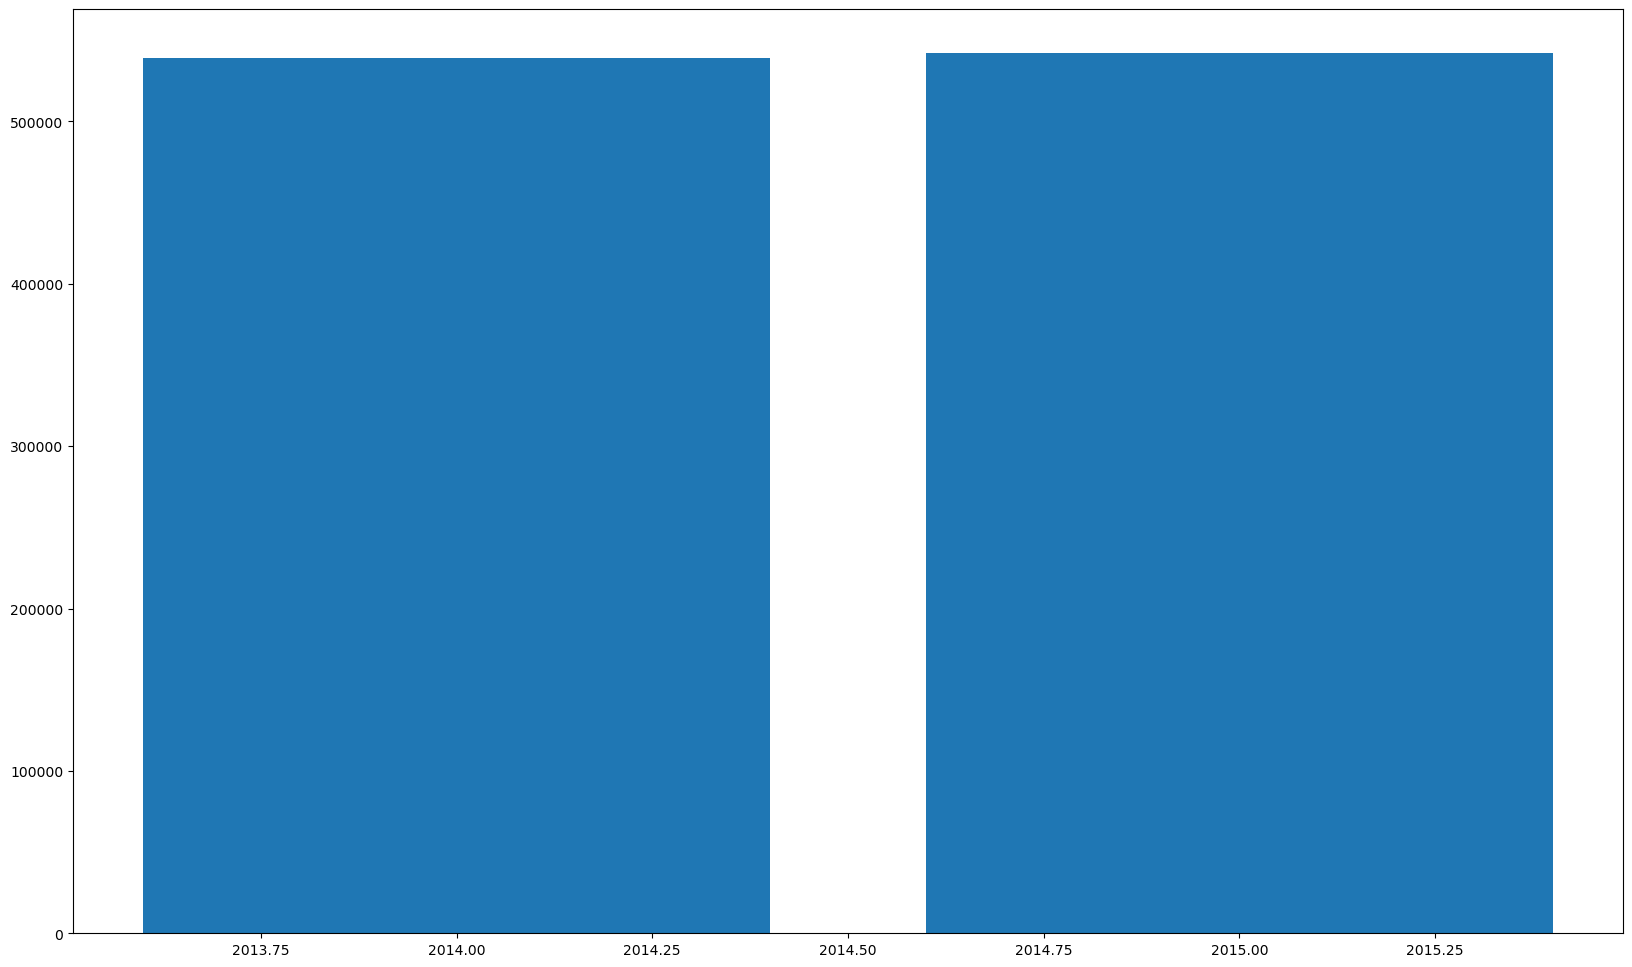

In [3]:
# 9 - Como é o crescimento médio de preços de compras dos imóveis por ano, semana e dia?
from matplotlib import pyplot
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Set a formatting that disables scientific notation of being used,  
# First graph.
data['year'] = pd.to_datetime(data['date']).dt.year  # Get the year of the dates.
chart_by_year = data[['price', 'year']].groupby('year').mean().reset_index()
pyplot.figure(figsize=(20, 12))
pyplot.bar(chart_by_year['year'], chart_by_year['price'])

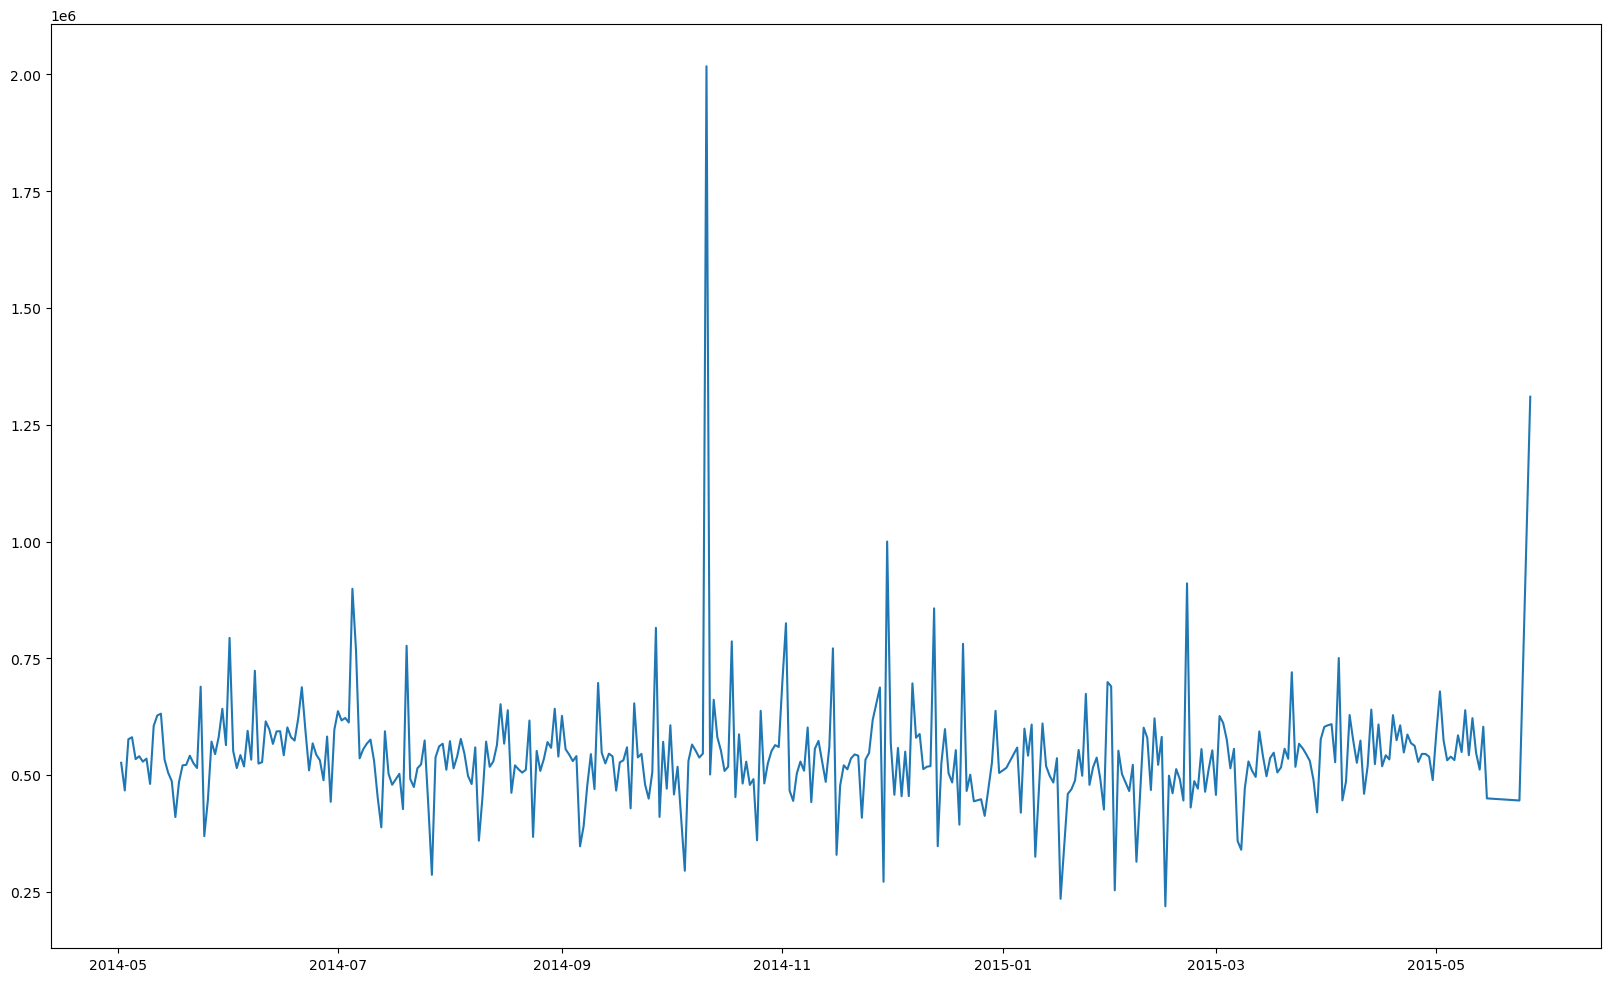

In [159]:
# Second graph.
data['date'] = pd.to_datetime(data['date'])
chart_by_day = data[['price', 'date']].groupby('date').mean().reset_index()
pyplot.figure(figsize=(20, 12))
pyplot.plot(chart_by_day['date'], chart_by_day['price'])

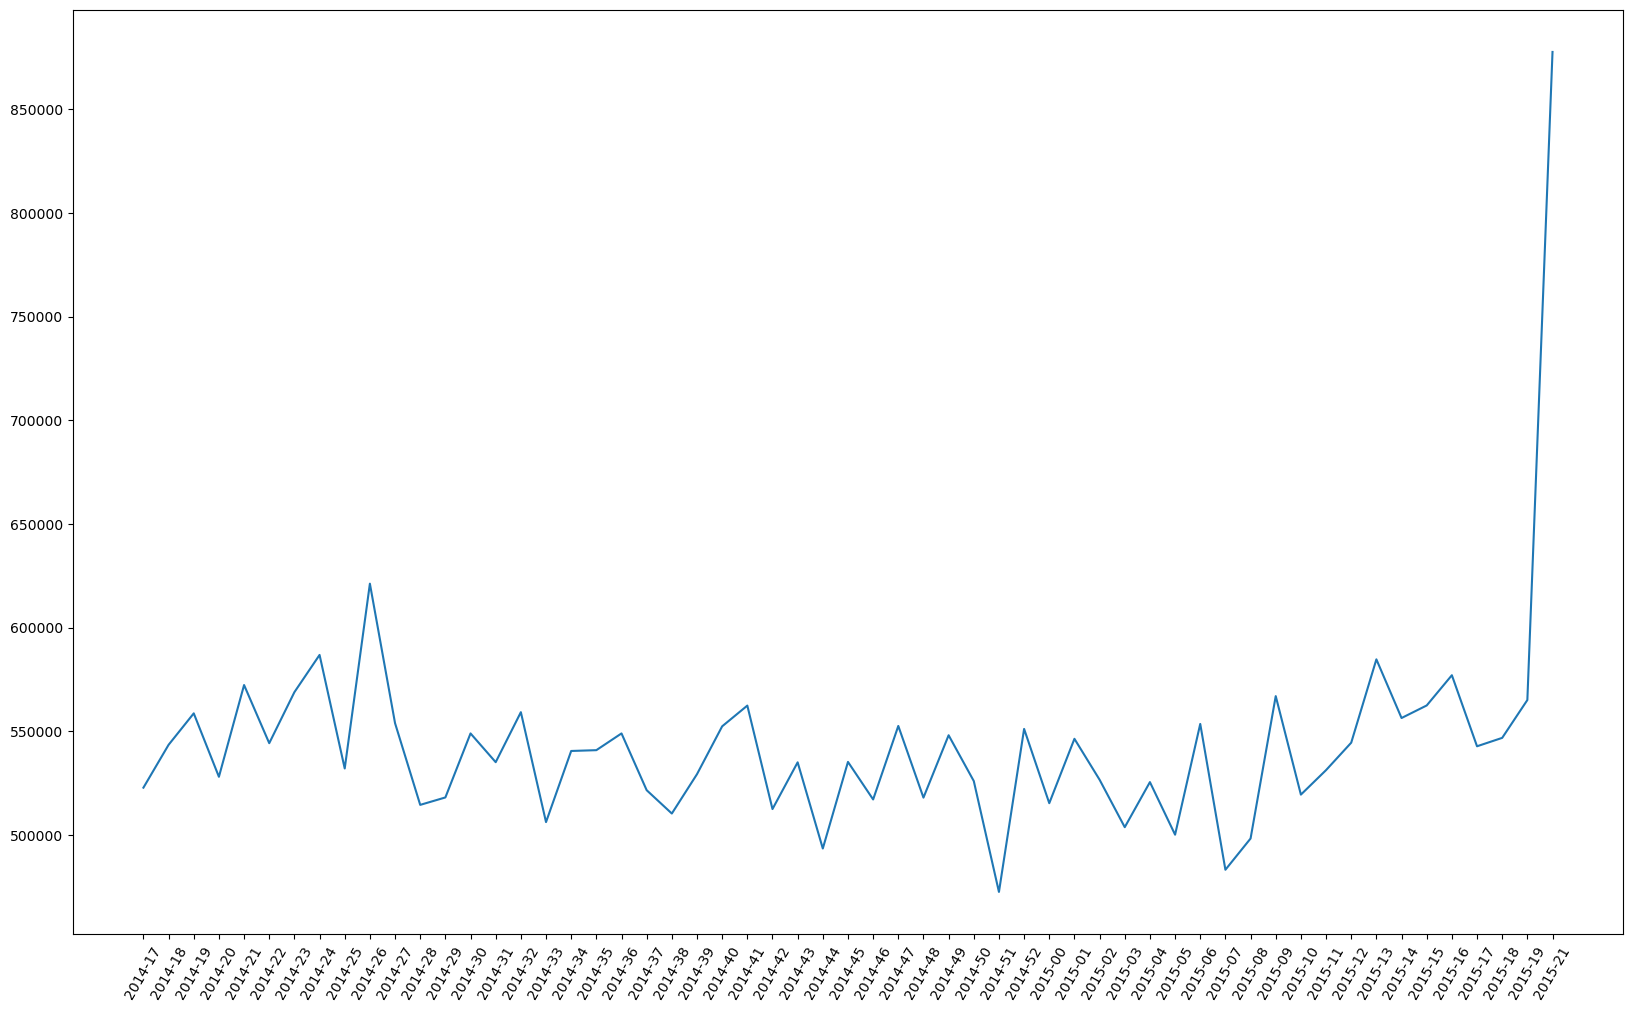

In [4]:
# Third graph.
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
chart_by_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
pyplot.figure(figsize=(20, 12))
pyplot.xticks(rotation=60)  # Rotate the labels of the X axis 60 degrees.
pyplot.plot(chart_by_week['year_week'], chart_by_week['price'])

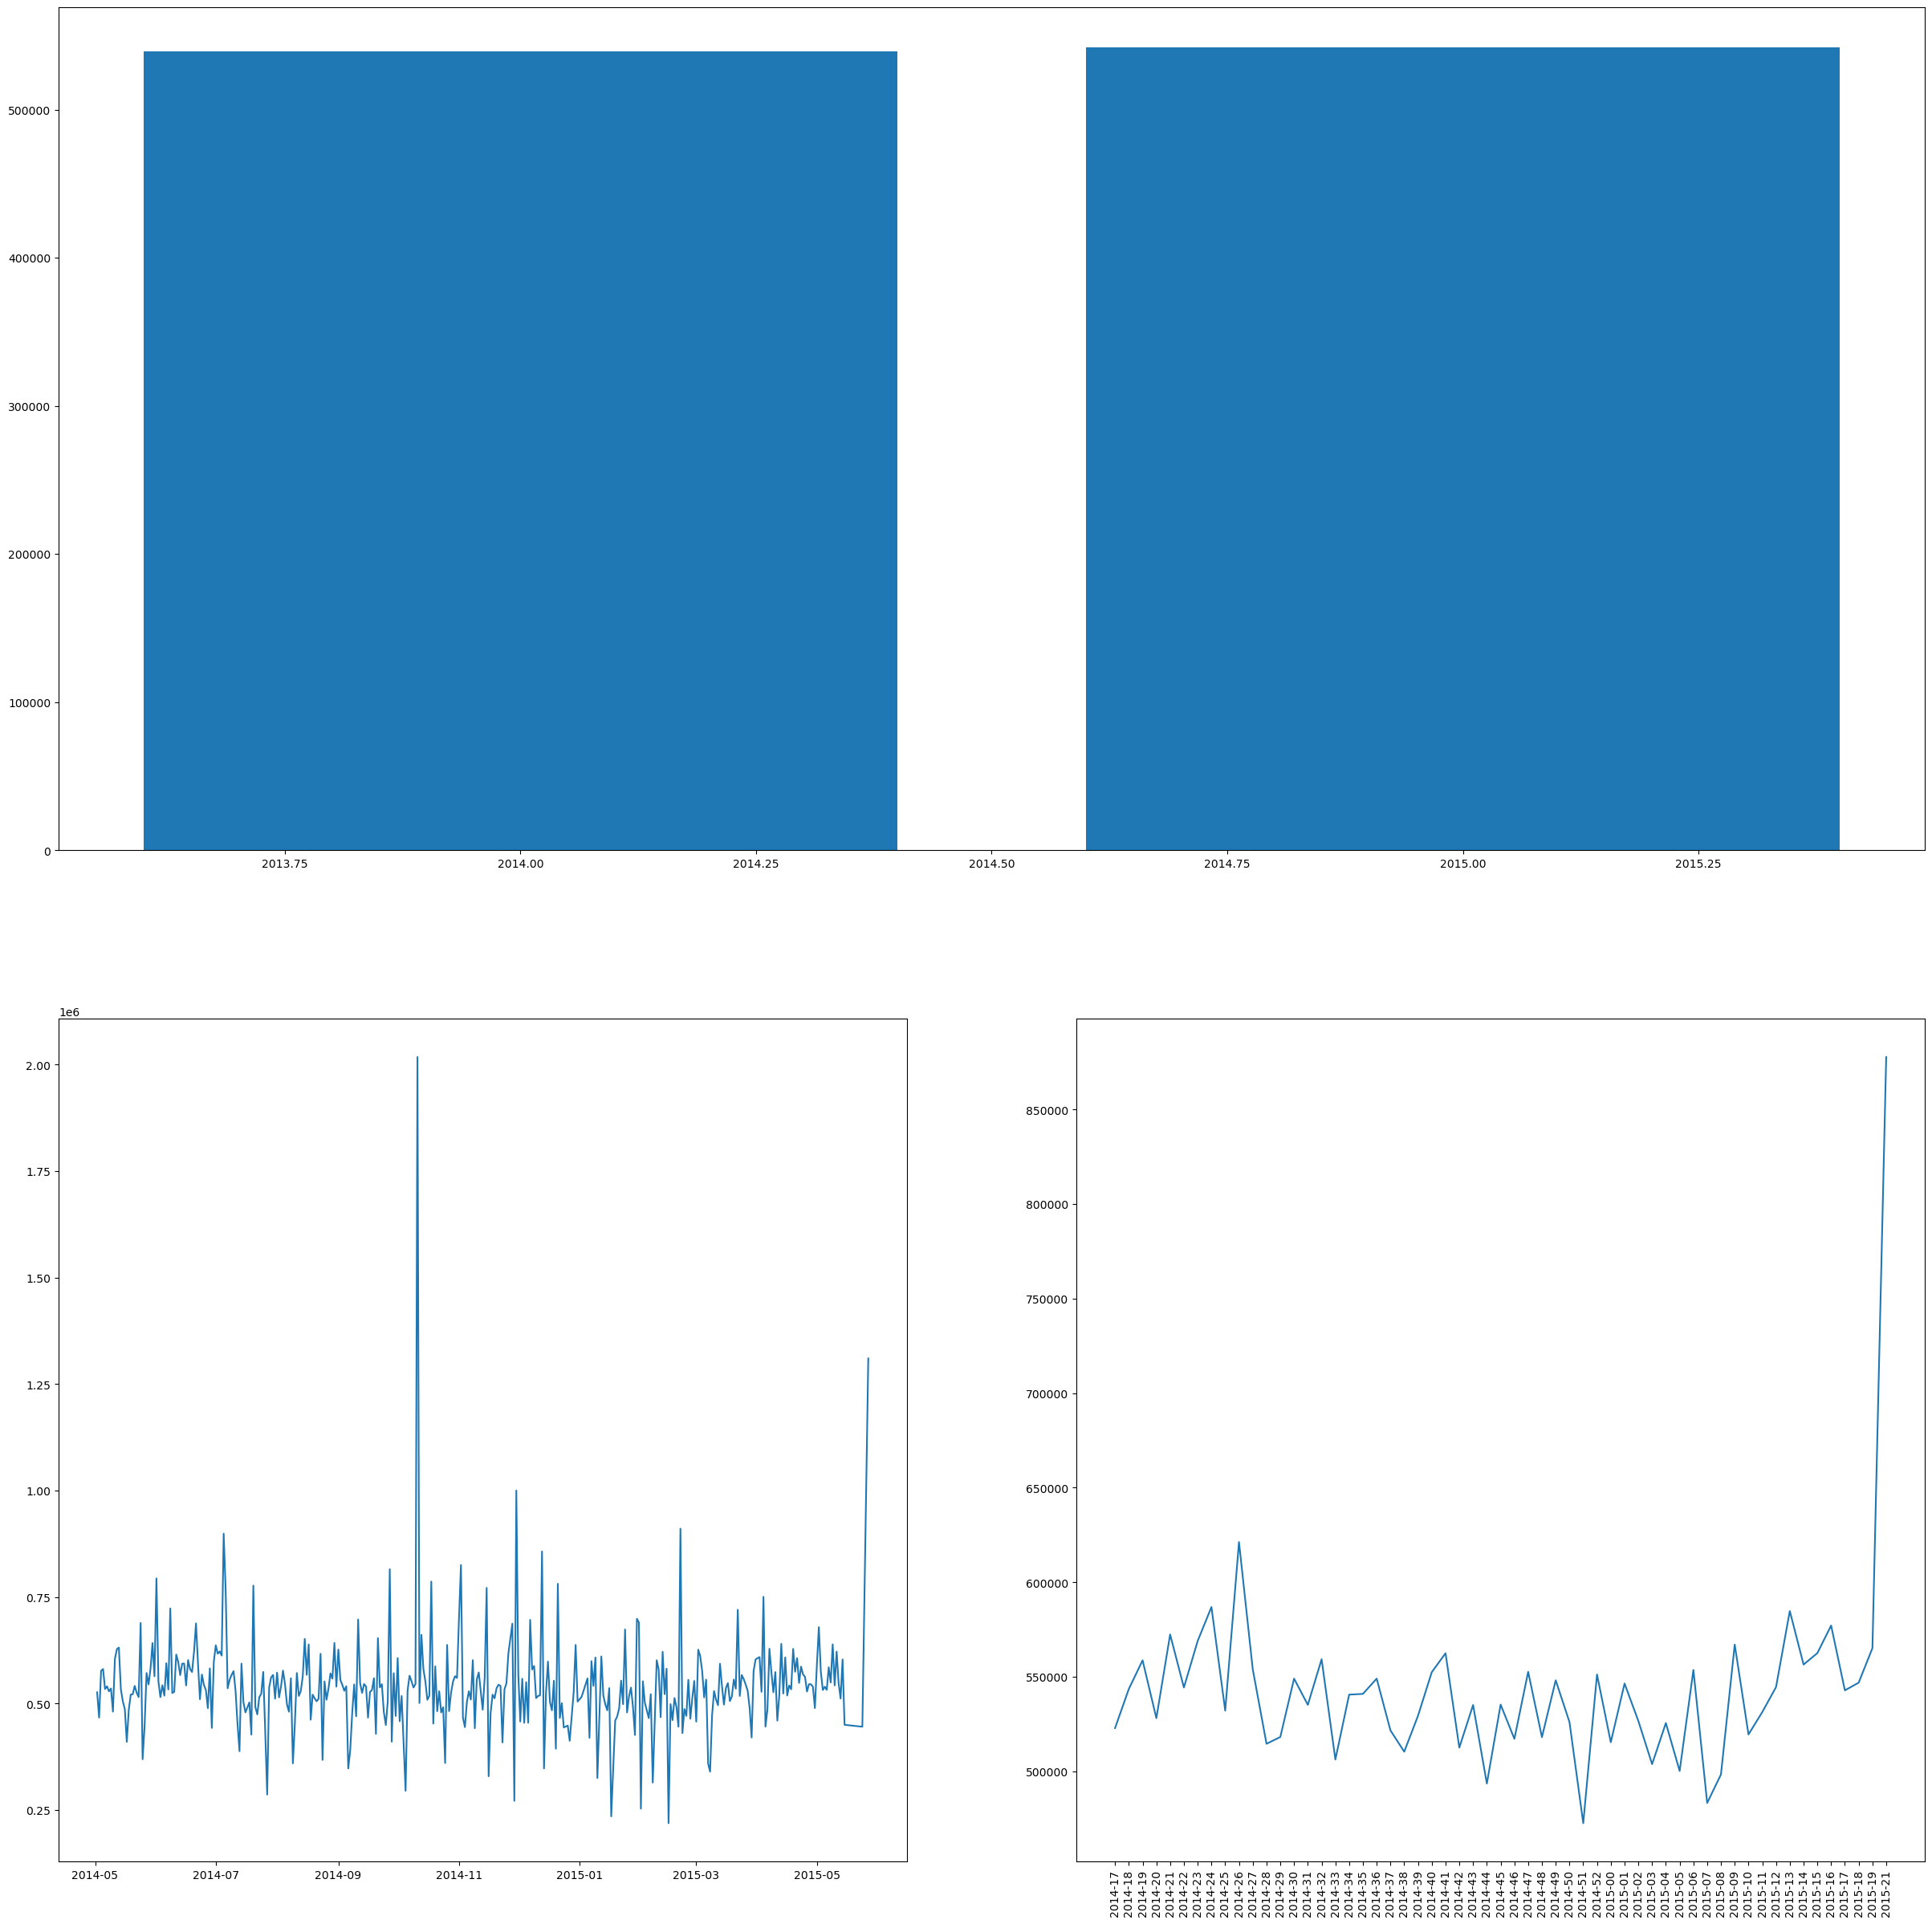

In [13]:
# Making a dashboard.
from matplotlib import gridspec


fig = pyplot.figure(figsize=(30, 30))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(specs[0, :])  # First row.
ax2 = fig.add_subplot(specs[1, 0])  # Second row - first column.
ax3 = fig.add_subplot(specs[1, 1])  # Second row - second column.


# First graph.
data['year'] = pd.to_datetime(data['date']).dt.year  # Get the year of the dates.
chart_by_year = data[['price', 'year']].groupby('year').mean().reset_index()
ax1.bar(chart_by_year['year'], chart_by_year['price'])

# Second graph.
data['date'] = pd.to_datetime(data['date'])
chart_by_day = data[['price', 'date']].groupby('date').mean().reset_index()
ax2.plot(chart_by_day['date'], chart_by_day['price'])

# Third graph.
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
chart_by_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
pyplot.xticks(rotation=90)  # Rotate the labels of the X axis 60 degrees.
ax3.plot(chart_by_week['year_week'], chart_by_week['price'])

In [21]:
# 10 - Fazer um mapa que traga as casas de maior preço de forma destacada (e.g., com um ponto maior).
from plotly import express as exp
map_data = data[['id', 'lat', 'long', 'price']]

house_map = exp.scatter_mapbox(
    map_data,
    lat='lat',
    lon='long',
    size='price',
    color_continuous_scale=exp.colors.cyclical.IceFire,
    size_max=15,
    zoom=10
)
house_map.update_layout(mapbox_style='open-street-map')
house_map.update_layout(height=600, margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
house_map.show()